In [242]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import os

In [243]:
image_path = "/cluster/home/pettdalh/tdt4265_project/cleaned_data/lidar_data/train/images/image_12.png"
label_path = image_path.replace('/images/', '/labels/').replace('.png', '.txt')

image = cv2.imread("/cluster/home/pettdalh/tdt4265_project/data/lidar_data/train/images/image_12.png")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [244]:
with open(label_path, 'r') as f:
    label_lines = f.readlines()

bboxes = [] # stores [x_center, y_center, width, height]
class_labels = []

for line in label_lines:
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    bboxes.append([x_center, y_center, width, height])
    class_labels.append(int(class_id))

In [245]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(0.9),
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

In [246]:
augmented = transform(image=image, bboxes=bboxes, class_labels=class_labels)
augmented_image = augmented["image"]
augmented_label = augmented["bboxes"]
augmented_class_labels = augmented['class_labels']

print(augmented_label, augmented_class_labels)

[[0.47900390625, 0.63671875, 0.00537109375, 0.12890625], [0.56494140625, 0.73046875, 0.00732421875, 0.28515625]] [0.0, 0.0]


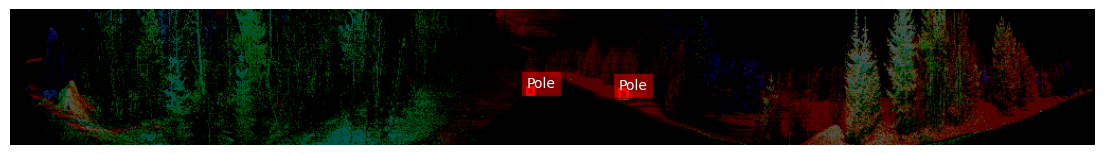

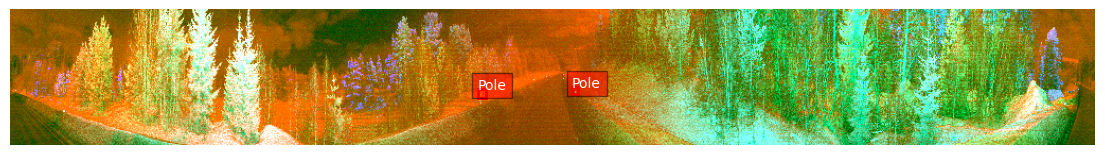

In [247]:
plt.figure(figsize=(14,14))
plt.imshow(augmented_image)
for [x, y, w, h] in augmented_label:
    img_height, img_width = image.shape[:2]
    x1 = int((x - w/2) * img_width)
    y1 = int((y - h/2) * img_height)
    x2 = int((x + w/2) * img_width)
    y2 = int((y + h/2) * img_height)
    rect = plt.Rectangle((x1, y1), x2-x1, x2-x1, fill=False, edgecolor='r', linewidth=2)
    plt.gca().add_patch(rect)
    plt.text(x1, y1, 'Pole', color='white', bbox=dict(facecolor='red', alpha=0.5))
plt.axis("off")
plt.show()

plt.figure(figsize=(14,14))
plt.imshow(image)
for [x, y, w, h] in bboxes:
    img_height, img_width = image.shape[:2]
    x1 = int((x - w/2) * img_width)
    y1 = int((y - h/2) * img_height)
    x2 = int((x + w/2) * img_width)
    y2 = int((y + h/2) * img_height)
    rect = plt.Rectangle((x1, y1), x2-x1, x2-x1, fill=False, edgecolor='r', linewidth=2)
    plt.gca().add_patch(rect)
    plt.text(x1, y1, 'Pole', color='white', bbox=dict(facecolor='red', alpha=0.5))
plt.axis("off")
plt.show()


In [248]:
image_path = "/cluster/home/pettdalh/tdt4265_project/cleaned_data/lidar_data/train/images/"
label_path = "/cluster/home/pettdalh/tdt4265_project/cleaned_data/lidar_data/train/labels/"

label_file_name = "image_12a.txt"
image_file_name = "image_12a.png"

with open(os.path.join(label_path, label_file_name), "w") as file:
    for i, [x, y, w, h] in enumerate(augmented_label):
        file.write(f"{int(augmented_class_labels[i])} {x} {y} {w} {h} \n")

cv2.imwrite(os.path.join(image_path, image_file_name), augmented_image)

True